In [2]:
! pip install arch

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install numpy 

Defaulting to user installation because normal site-packages is not writeable


In [4]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
! pip install scikit-learn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from arch.univariate import GARCH, ZeroMean
import pandas as pd 
from math import log 
from sklearn.linear_model import LinearRegression

## Echantillonnage des données simulées selon un modèle GARCH(1,1)  

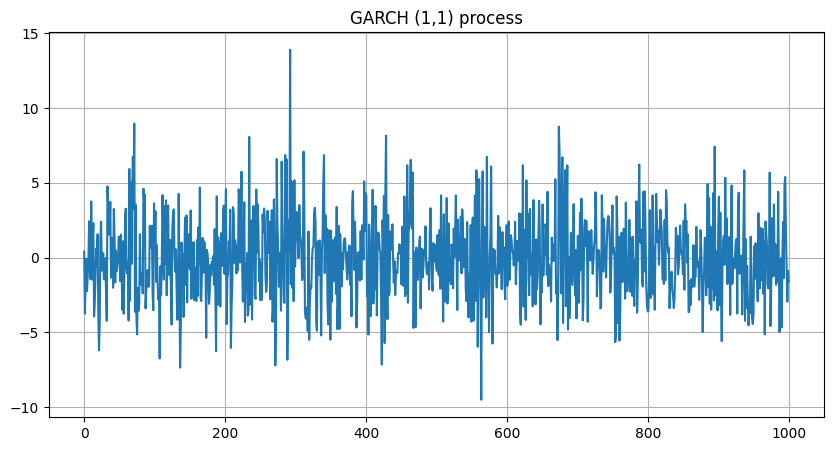

In [52]:

np.random.seed(12345)

n = 1000        # n le nombre d'observations à générer
n1 = 100        # n1 est le nombre des observations premières qu'on supprime de l'échantillon 
n2 = n + n1     # n2 est le nombre de simulations total

# Les paramètres de GARCH(1,1)
omega = 1
alpha = 0.2   
beta = 0.7

errors = np.random.normal(0,1,n2) 
h2 = np.zeros(n2)
r = np.zeros(n2)
h2[0] = omega

for i in range(1,n2-1): 
    h2[i] = omega + alpha*h2[i-1]*errors[i-1]**2 + beta*h2[i-1]
    r[i] = np.sqrt(h2[i])*errors[i]


y = r[n1-1:-1]    # On élimine les premières observations

plt.figure(figsize=(10, 5))
plt.title('GARCH (1,1) process')
x = range(n) 
plt.plot(x,y)
plt.grid(True)
plt.show()

## Récupération des données réelles 

On calcule la transformation logarithmique du taux de change Euro/US Dollar journalier sur la période entre 24/04/2021 et 24/04/2024.

Source : https://www.investing.com/currencies/eur-usd-historical-data

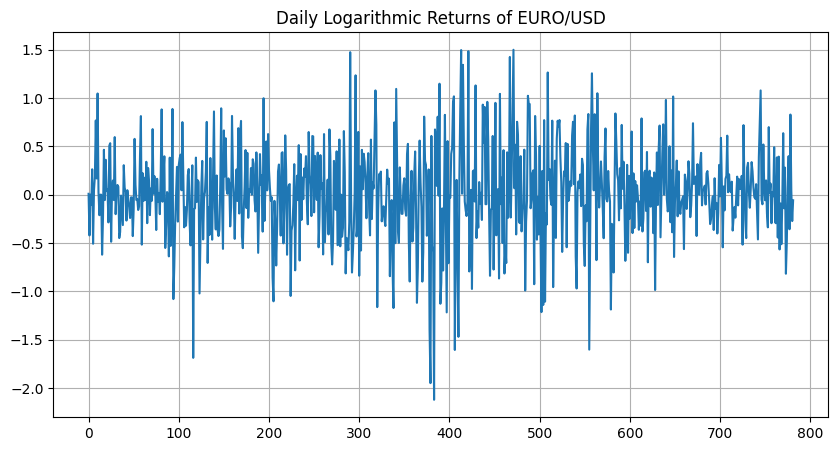

In [77]:
Prix = pd.read_csv("/home/onyxia/Monte-Carlo-based-project/EUR_USD Historical Data.csv")['Price']
r = []
for i in range(len(Prix)-1) :
    r.append(log(Prix[i+1]/ Prix[i])*100)

plt.figure(figsize=(10, 5))
plt.title('Daily Logarithmic Returns of EURO/USD')
x = range(len(r)) 
plt.plot(x,r)
plt.grid(True)
plt.show()


## Control Variates : Second order ZV for MCMC

In [ ]:
# Définition des variables de controle 

# z est un échantillon de 2000 triplets (z1,z2,z3) par exemple de type np.array.
# x est un échantillon de 2000 triplets (omega, alpha, beta) par exemple de type np.array.

i = np.ones(z.shape)
u = z*x -0.5*i
v1 = x[:,1]*z[:,0] + x[:,0]*z[:,1]
v2 = x[:,2]*z[:,0] + x[:,0]*z[:,2]
v3 = x[:,2]*z[:,1] + x[:,1]*z[:,2]
v = np.column_stack((v1, v2, v3))
vT = v.transpose()
uT = u.transpose()
zT = z.transpose()
zTuTvT = np.concatenate((zT, uT, vT), axis = 0)

# y est un échantillon de même taille que x et z de 9-uplets ; Pour ZV-MCMC de degré 2 on a 9 variables de contrôles
# Une colonne de y est une variable de contôle 
y = zTuTvT.transpose()

In [ ]:
d = dict() 
# d est un dictionnaire qui stocke les coefficients optimaux des variables de contrôle de chacun des x0 := omega, x1 = alpha et x2 = beta.
for i in [0,1,2]:
    model = LinearRegression()
    model.fit(y, x[:,i])
    d['x' + str(i)] = model.coef_